# Coding in Python: Dos and Don’ts

### Content

1. [Clean Code](#Chapter1)
2. [Pythonic Code](#Chapter2)
3. [How to structure a method](#Chapter3)
4. [Commenting & Documenting](#Chapter4)
5. [Errors, debugging, logging](#Chapter5)
6. [Importing](#Chapter6)

##  1. <a id='Chapter1'> Clean Code </a>

* Follow the [PEP 8](https://www.python.org/dev/peps/pep-0008/) Style Guide
    * code layout 
    * basic naming conventions 
    * programming recommendations
    * commenting
    * varia
* PyLint is your friend
* Correctness - Tightness -  Readability 

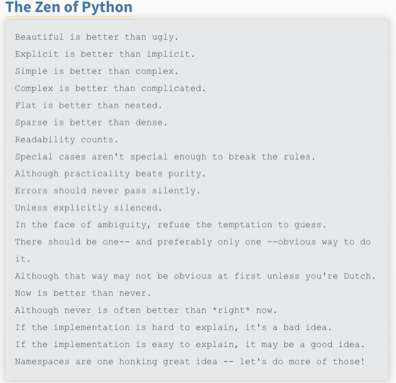

### PEP 8 Quickie: Code Layout

* _Indentation_: 4 spaces per level. For continuation lines, decide between vertical alignment & hanging indentation as shown here:
 <pre><code>
    # Vertically aligned with opening delimiter.
    foo = long_function_name(var_one, var_two,
                             var_three, var_four)

    # Hanging indentation (4 additonal spaces)
    def very_very_long_function_name(
            var_one, var_two, var_three,
            var_four):
    print(var_one)
  </code></pre>
* _Line limit_: maximum of 79 characters (docstrings & comments 72).
* _Blank lines_: 
    * **Two**: Surround top-level function and class definitions; 
    * **One:** Surround Method definitions inside a class 
    * **Several:** may be used (sparingly) to separate groups of related functions
    * **None:** Blank lines may be omitted between a bunch of related one-liners (e.g. a set of dummy implementations).
* _Whitespaces_: 
    * **None** immediately inside parentheses, brackets or braces; after trailing commas; for keyword assignments in functions. 
    * **Do** for assignments (`i = i + 1`), around comparisons (`>=`, `==`, etc.), around booleans (`and`, `or`, `not`)
* There's more in the PEP 8 guide!

### PEP 8 Quickie: Basic Naming Conventions

### PEP 8 Quickie: Programming Recommendations

### Linting and PyLint

Pylint is a source-code, bug and quality checker. It follows the style recommended by PEP 8 and  also includes the following features:

Checking the length of each line
Checking that variable names are well-formed according to the project's coding standard
Checking that declared interfaces are truly implemented.

--> How to work with it in spyder

--> What to immediately fix of pylint output

--> how to further configure (??)

### A few more best practices

**Correctness**

Methods and functions must return correct and verifiable results, not only under the best circumstances but in any possible context.
I.e. ideally there should be unit tests exploring the full space of parameters, configuration and data states.
This is often clearly a non-achievable goal, but still - we aim at it.

**Tightness**

- Avoid code redundancy.
- Make the program efficient, use profiling tools for detection of bottlenecks.
- Try to minimize memory consumption.
- Don't introduce new dependencies (library imports) when the desired functionality is already covered by existing dependencies.
- Stick to already supported file types.

**Readability**

- Write complete Python Docstrings.
- Use meaningful method and parameter names, and always annotate the data types of parameters and return values.
- No context-dependant return types! Also: Avoid `None` as return type, rather raise an Exception instead.
- Be generous with defining Exception classes.
- Comment! Comments are welcome to be redundant.
  And whenever there is a particular reason for the way something is done, comment on it!
  It *will* pay off when maintaining, extending or debugging. An extensive guide is [here](https://realpython.com/python-comments-guide/#when-writing-code-for-others).
- For functions which implement mathematical/scientific concepts, add the actual mathematical formula as comment or
  to the Doctstrings. This will help maintain a high level of scientific accuracy. E.g. How is are the random walk
  tracks computed for tropical cyclones?

## 2. <a id='Chapter2'> Pythonic Code </a>
Typical python structures such as  list comprehension, and iterators / iterables and generators (the latter only as a side note potentially with ref to https://treyhunner.com/2018/06/how-to-make-an-iterator-in-python/#Generators:_the_easy_way_to_make_an_iterator and stating that they can be very useful for code performance, avoiding to read in / return huge iterables at once

variable should not change type, mutable default parameters are banned


## 3. <a id='Chapter3'> How to structure a method </a>

## 4. <a id='Chapter4'> Commenting & Documenting </a>

What to comment, how to comment (_not_ in the sense of code review but inside the script). Pick out summary from https://realpython.com/python-comments-guide/#when-writing-code-for-others

Numpy-style docstrings


## 5. <a id='Chapter5'> Errors, Debugging, Logging </a>
Proposition on how to raise & catch errors

Propostion on how to log: what to log, what logging level for what issue, how to turn logging on & off

## 6. <a id='Chapter6'> Importing </a>

**General remarks** <br>
Imports should be grouped in the following order:
- Standard library imports.
- Related third party imports.
- Local application/library specific imports.
You should put a blank line between each group of imports.
<br>

**Avoid cross importing!!**